<a href="https://colab.research.google.com/github/drMy5tery/SemV-QC/blob/Lab-1/2448540_Lab1_QC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1 — Defining and Displaying State Vectors


In [1]:
!pip install qiskit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 1.6 MB/s eta 0:00:00


### Cell 3: Statevector Objects and Validity

This cell demonstrates how to create `Statevector` objects from NumPy arrays and check if they represent valid quantum states using the `.is_valid()` method. A valid quantum state must have a norm (length) of 1. The cell also shows how to get a text representation of the statevector and a LaTeX output for better visualization in environments that support it.

### Cell 4: Simulated Measurements

This cell simulates single and multiple measurements of a quantum state represented by a `Statevector`. The `.measure()` method simulates a single measurement, returning the outcome (0 or 1 for a single qubit) and the resulting post-measurement state (which collapses to the measured basis state). The cell also shows how running multiple independent trials can result in different outcomes due to the probabilistic nature of quantum mechanics.

### Cell 5: Sampling and Histogram

This cell demonstrates how to simulate a large number of measurements (shots) on a statevector using the `.sample_counts()` method. This method returns a dictionary of outcomes and their frequencies. The cell then uses `qiskit.visualization.plot_histogram` to visualize these counts, showing the distribution of measurement outcomes over many trials. The observed frequencies should approximate the theoretical probabilities squared of the amplitudes in the statevector.

In [2]:
# Cell 1: Imports
import numpy as np
from numpy import sqrt
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Ensure plots display inline (if using Jupyter)
%matplotlib inline

In [3]:
# Cell 2: Define basis vectors and demonstrate averaging and normalization
ket0 = np.array([1, 0], dtype=complex)
ket1 = np.array([0, 1], dtype=complex)

print("ket0 =", ket0)
print("ket1 =", ket1)

# Element-wise average (not a valid quantum state unless normalized)
avg = (ket0 + ket1) / 2
print("\nraw average (not normalized) =", avg)

# Normalized equal superposition using sqrt from numpy
u = (ket0 + ket1) / sqrt(2)
print("\nnormalized equal superposition u =", u)
print("Euclidean norm of u =", np.linalg.norm(u))

# Example of creating a matrix (Hadamard) and doing matrix-vector multiplication
H = (1/sqrt(2)) * np.array([[1, 1], [1, -1]], dtype=complex)
Hv = np.matmul(H, ket0)  # use np.matmul as recommended in the manual
print("\nnp.matmul(H, |0>) =", Hv)

# You can also use np.dot for matrix-vector multiplication; matmul is clearer for this purpose.
Hd_dot = np.dot(H, ket0)
print("np.dot(H, |0>) =", Hd_dot)

ket0 = [1.+0.j 0.+0.j]
ket1 = [0.+0.j 1.+0.j]

raw average (not normalized) = [0.5+0.j 0.5+0.j]

normalized equal superposition u = [0.70710678+0.j 0.70710678+0.j]
Euclidean norm of u = 0.9999999999999999

np.matmul(H, |0>) = [0.70710678+0.j 0.70710678+0.j]
np.dot(H, |0>) = [0.70710678+0.j 0.70710678+0.j]


In [4]:
# Cell 3: Create Statevector objects and check validity
u_sv = Statevector(u)  # (|0> + |1>)/sqrt(2)

# Vector v as in the manual: amplitudes sqrt(5)/3 and 2/3, then normalized
v = np.array([sqrt(5)/3, 2/3], dtype=complex)
v = v / np.linalg.norm(v)  # ensure normalization
v_sv = Statevector(v)

print("u_sv.is_valid():", u_sv.is_valid())
print("v_sv.is_valid():", v_sv.is_valid())

print("\nText representation of u_sv:")
print(u_sv.draw(output='text'))

# LaTeX output (renders in Jupyter notebooks that support LaTeX)
display(u_sv.draw(output='latex'))

u_sv.is_valid(): True
v_sv.is_valid(): True

Text representation of u_sv:
[0.70710678+0.j,0.70710678+0.j]


<IPython.core.display.Latex object>

In [5]:
# Cell 4: Measurements (single-shot and repeated trials)
sv = v_sv.copy()

# Check validity before measuring (Statevector.measure will raise if invalid)
if not sv.is_valid():
    raise ValueError('Statevector is not a valid quantum state (norm != 1).')

# Single simulated measurement
outcome, post_state = sv.measure()
print("Single measurement outcome:", outcome)
print("Post-measurement state (collapsed):", post_state)

# Run a few independent measurement trials to observe probabilistic outcomes
print('\nThree independent trials:')
for i in range(3):
    trial_sv = v_sv.copy()
    o, _ = trial_sv.measure()
    print(f"Trial {i+1} outcome: {o}")

Single measurement outcome: 1
Post-measurement state (collapsed): Statevector([0.+0.j, 1.+0.j],
            dims=(2,))

Three independent trials:
Trial 1 outcome: 0
Trial 2 outcome: 0
Trial 3 outcome: 1


Sample counts (1000 shots): {np.str_('0'): np.int64(552), np.str_('1'): np.int64(448)}


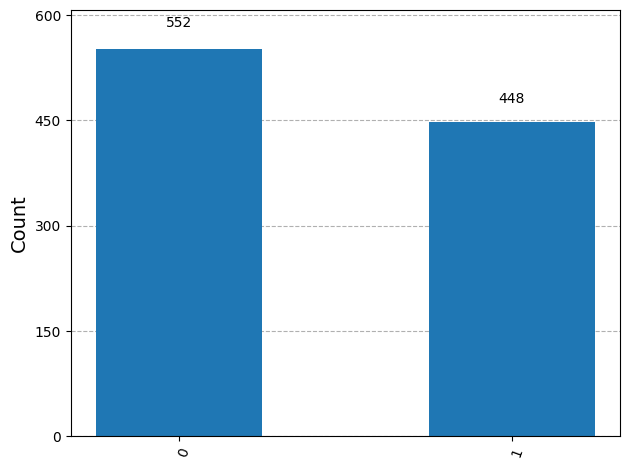

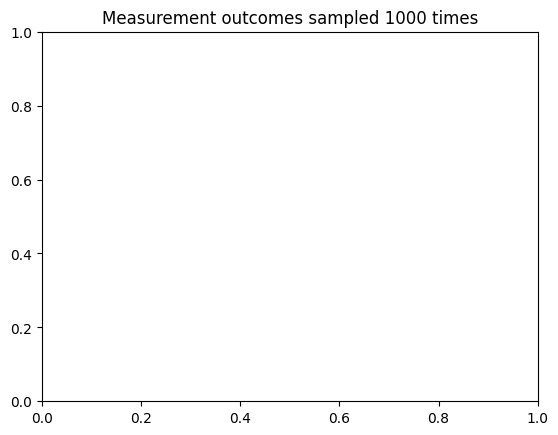

In [7]:
# Cell 5: Sampling many measurements and plotting a histogram
shots = 1000
counts = v_sv.sample_counts(shots=shots)
print(f"Sample counts ({shots} shots): {counts}")

# The manual notes that with high probability the counts will be approximately
# {'0': 556, '1': 444} for these amplitudes when shots=1000 (about 5/9 and 4/9).
fig = plot_histogram(counts)
plt.title(f"Measurement outcomes sampled {shots} times")
# Use display(fig) to ensure the plot is rendered in the notebook
display(fig)